In [4]:
import numpy as np
import matplotlib.pyplot as plt

class IsingModel():
    def __init__(self, Nx, Ny, J=1, h=0, beta=1, p_init=0.5):
        """Initialize the lattice of spins with values {-1,+1}."""
        self.Nx, self.Ny = Nx, Ny
        self.J = J
        self.h = h
        self.beta = beta
        self.spin_field = np.sign(np.random.rand(Nx, Ny) - p_init)
        self.rng = np.random.default_rng()
    
    def compute_energy_full(self):
        """Compute the total energy of the system."""
        energy = 0
        for i in range(self.Nx):
            for j in range(self.Ny):
                S = self.spin_field[i, j]
                neighbors = (self.spin_field[(i+1) % self.Nx, j] +
                             self.spin_field[(i-1) % self.Nx, j] +
                             self.spin_field[i, (j+1) % self.Ny] +
                             self.spin_field[i, (j-1) % self.Ny])
                energy += -self.J * S * neighbors - self.h * S
        return energy / 2  # Each bond counted twice
    
    def pick_random_site(self):
        """Pick a random lattice site."""
        pick_x = self.rng.integers(self.Nx)
        pick_y = self.rng.integers(self.Ny)
        return pick_x, pick_y
    
    def compute_energy_change(self, pick_x, pick_y):
        """Compute the energy difference when flipping a single spin."""
        S = self.spin_field[pick_x, pick_y]
        neighbors = (self.spin_field[(pick_x+1) % self.Nx, pick_y] +
                     self.spin_field[(pick_x-1) % self.Nx, pick_y] +
                     self.spin_field[pick_x, (pick_y+1) % self.Ny] +
                     self.spin_field[pick_x, (pick_y-1) % self.Ny])
        dE = 2 * self.J * S * neighbors + 2 * self.h * S
        return dE
    
    def simulate_step(self):
        """Perform one Monte Carlo step using the Metropolis algorithm."""
        x, y = self.pick_random_site()
        dE = self.compute_energy_change(x, y)
        if dE <= 0 or np.random.rand() < np.exp(-self.beta * dE):
            self.spin_field[x, y] *= -1
    
    def simulate_multistep(self, num_flip_steps):
        """Perform multiple Monte Carlo steps."""
        for _ in range(num_flip_steps):
            self.simulate_step()


In [58]:
x = IsingModel(100, 100, J=1, h=0, beta=10, p_init=0.5)
x.simulate_multistep(100000)
y = IsingModel(100, 100, J=-1, h=0, beta=10, p_init=0.5)
y.simulate_multistep(100000)
v = IsingModel(100, 100, J=1, h=0, beta=0.1, p_init=0.5)
v.simulate_multistep(100000)
h = IsingModel(100, 100, J=-1, h=0, beta=0.1, p_init=0.5)
h.simulate_multistep(100000)



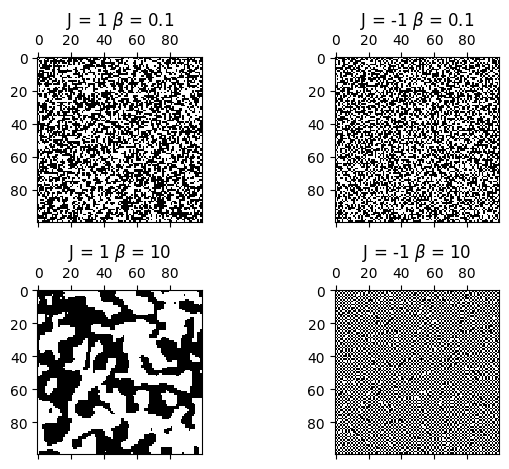

In [71]:
fig, ax = plt.subplots(2,2)
ax[0,0].matshow(v.spin_field, cmap='binary')
ax[0,0].set_title(r"J = 1 $ \beta $ = 0.1")


ax[0,1].matshow(h.spin_field, cmap='binary')
ax[0,1].set_title(r"J = -1 $ \beta $ = 0.1")

ax[1,1].matshow(y.spin_field, cmap='binary')
ax[1,1].set_title(r"J = -1 $ \beta $ = 10")

ax[1,0].matshow(x.spin_field, cmap='binary')
ax[1,0].set_title(r"J = 1 $ \beta $ = 10")

plt.tight_layout()
